In [23]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
import cv2

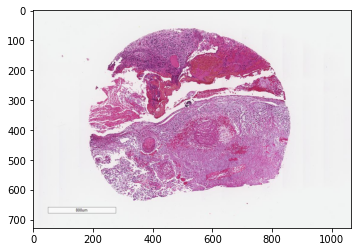

In [24]:
# load the image
image = skimage.io.imread("../data/uab_data/keras/recurrent/CoreID3.jpg")

fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

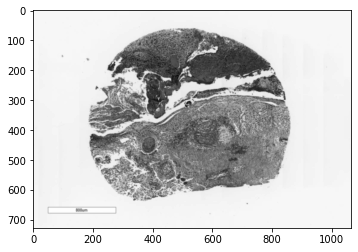

In [25]:
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")
plt.show()

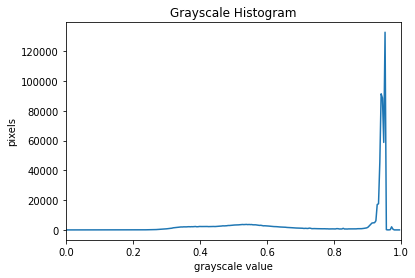

In [26]:

# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()


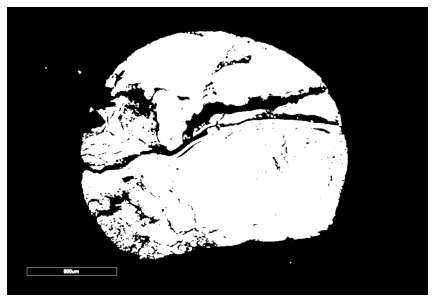

In [37]:

# create a mask based on the threshold
t = 0.8
binary_mask = blurred_image < t
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(binary_mask, cmap="gray")
plt.savefig('bin.png')
plt.show()

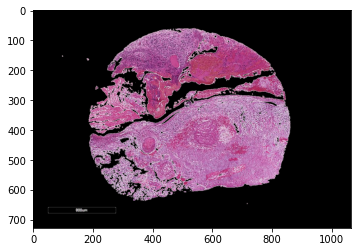

In [28]:
# use the binary_mask to select the "interesting" part of the image
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)
plt.savefig('selected.png')
plt.show()

